# MNIST Data 

In [16]:
import pandas as pd
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

In [17]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


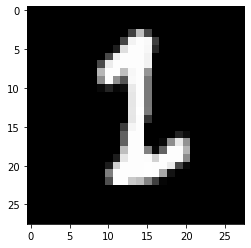

In [18]:
instance = 70
plt.imshow(np.reshape(np.array(df_train.iloc[instance,1:]), (-1,28)), cmap = 'gray')
plt.show()

In [19]:
#Splitting training and test data/labels
X_train = df_train[df_train.columns[1:]]
y_train = df_train['label'] 
X_test = df_test[df_test.columns[1:]] 
y_test = df_test['label']

In [20]:
#Use smaller subset to read into memory
X_train = X_train[:10000]
y_train = y_train[:10000]
X_test = X_test[:2000]
y_test = y_test[:2000]

In [21]:
#Assign 0 label to even numbers and 1 label to odd numbers for train labels
for x, y in enumerate(y_train):
    if y in [0,2,4,6,8]:
        y_train[x] = 0
    elif y in [1,3,5,7,9]:
        y_train[x] = 1

In [22]:
#Assign 0 label to even numbers and 1 label to odd numbers for test labels
for x, y in enumerate(y_test):
    if y in [0,2,4,6,8]:
        y_test[x] = 0
    elif y in [1,3,5,7,9]:
        y_test[x] = 1

In [23]:
#Convert to correct types for consistency
X_train = X_train.astype('float32')
y_train = y_train.astype('int32')   
X_test = X_test.values.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# Creating CNN Model

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils

In [25]:
y_train = keras.utils.np_utils.to_categorical(y_train, 2)

In [26]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape = (784,)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax')) 

2022-12-05 00:31:57.870398: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-05 00:31:57.870472: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-05 00:31:57.870523: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2022-12-05 00:31:57.871089: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 108,866
Trainable params: 108,866
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='mse', optimizer=RMSprop(lr = 0.001), metrics=['accuracy'])

/home/wjluu/.local/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

In [30]:
import keras
from matplotlib import pyplot as plt

In [31]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 128, verbose = 1, validation_data = (x_val, y_val))

Epoch 1/20
59/59 [==============================] - 1s 11ms/step - loss: 0.1101 - accuracy: 0.8453 - val_loss: 0.0567 - val_accuracy: 0.9304
Epoch 2/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0551 - accuracy: 0.9313 - val_loss: 0.0355 - val_accuracy: 0.9540
Epoch 3/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0389 - accuracy: 0.9533 - val_loss: 0.0305 - val_accuracy: 0.9592
Epoch 4/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0316 - accuracy: 0.9601 - val_loss: 0.0293 - val_accuracy: 0.9604
Epoch 5/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0252 - accuracy: 0.9695 - val_loss: 0.0273 - val_accuracy: 0.9624
Epoch 6/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0213 - accuracy: 0.9744 - val_loss: 0.0237 - val_accuracy: 0.9680
Epoch 7/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0175 - accuracy: 0.9785 - val_loss: 0.0224 - val_accuracy: 0.9724
Epoch 8/20
59/59 [=

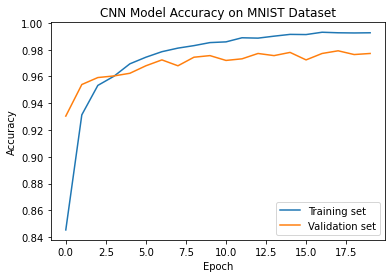

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy on MNIST Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='lower right')
plt.show()